In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Q1

In [2]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
dark_image = imread('powerlines.png')

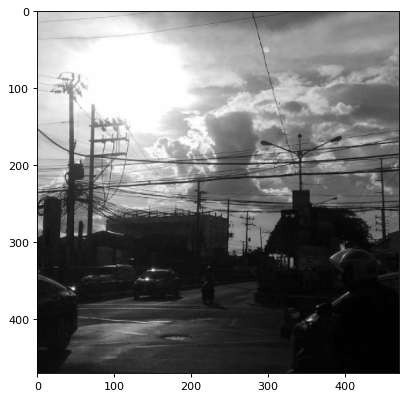

In [3]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')

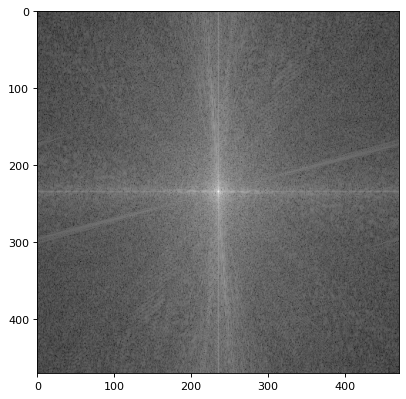

In [4]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

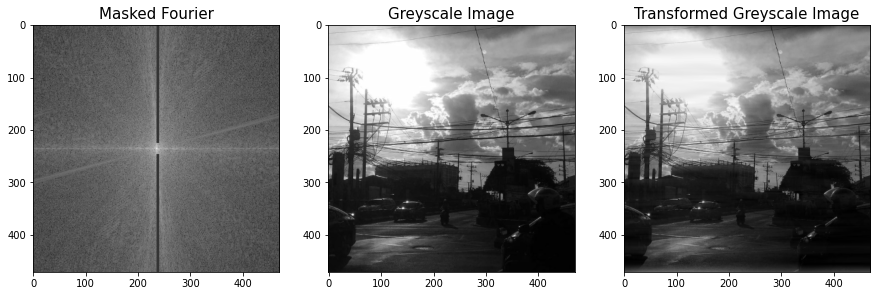

In [8]:
def fourier_masker_ver(image):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = 1
    dark_image_grey_fourier[-225:,235:240] = 1
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image)

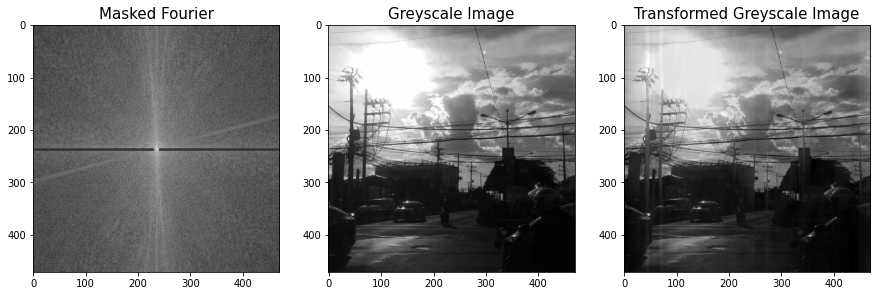

In [10]:
def fourier_masker_hor(image):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = 1
    dark_image_grey_fourier[235:240,-230:] = 1
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size)
fourier_masker_hor(dark_image)

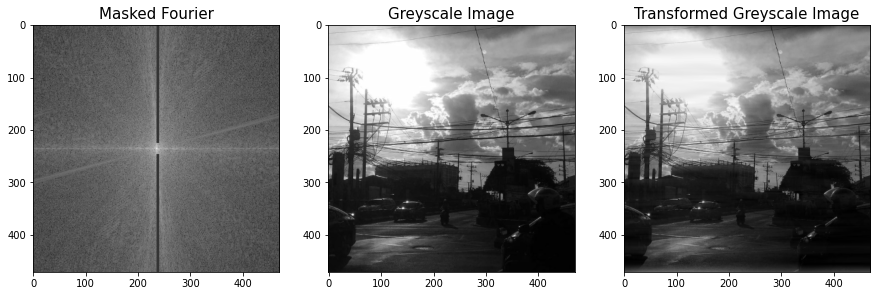

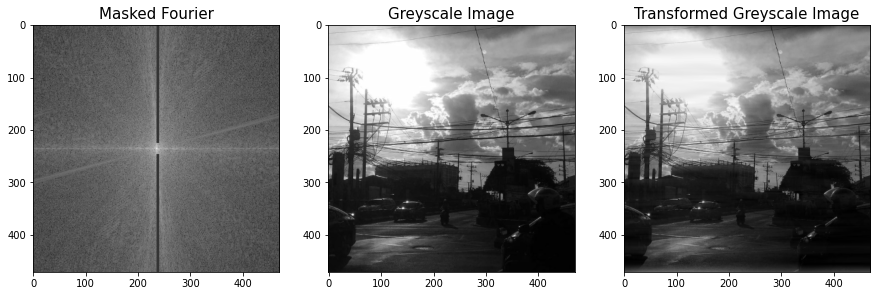

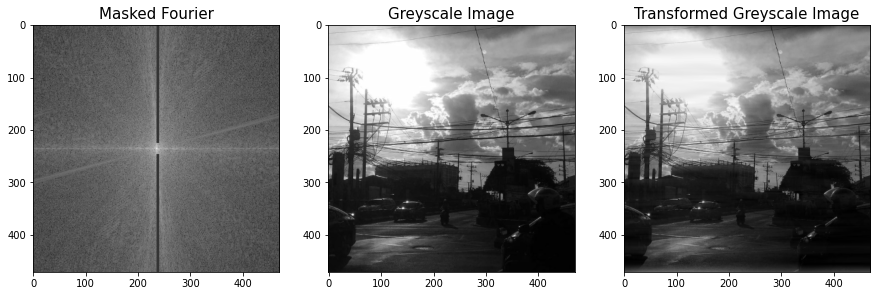

In [12]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image)
 
fourier_iterator(dark_image, [0.001, 1, 100])

In [13]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


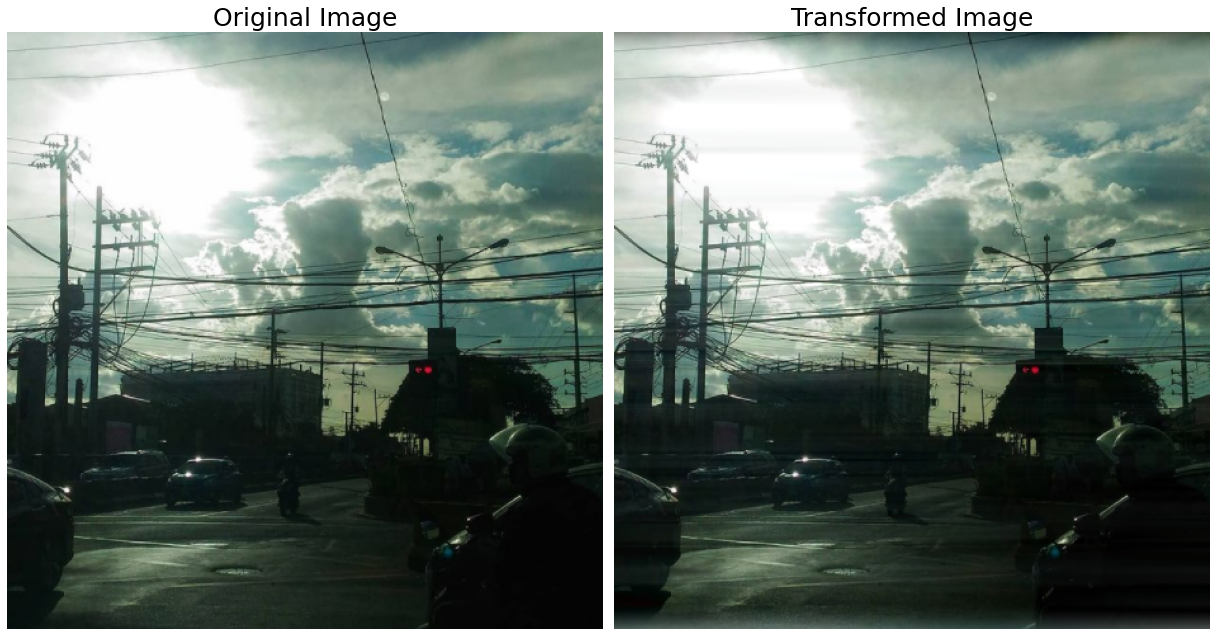

In [14]:
fourier_transform_rgb(dark_image)

# Q2

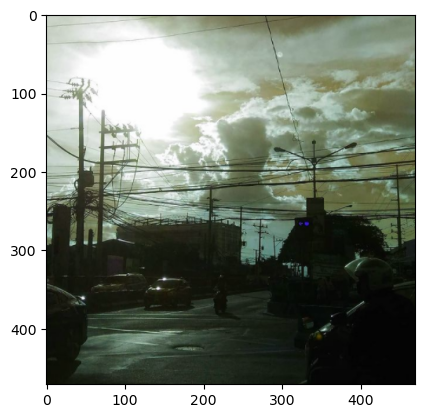

In [2]:
image = cv2.imread("powerlines.png")
imgplot = plt.imshow(image)
plt.show()

In [3]:
gaussian_3 = cv2.GaussianBlur(image, (0, 0), 2.0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
plt.imshow(unsharp_image)

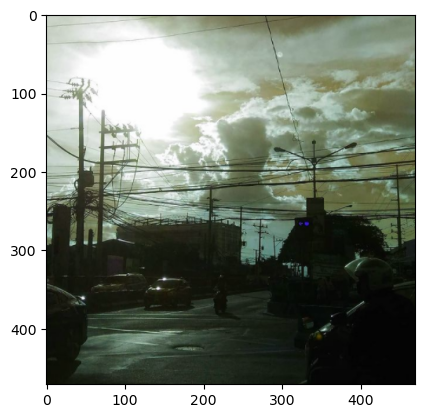

In [11]:
boost_factor = 2
image = cv2.imread("powerlines.png")
plt.imshow(image)
plt.show()

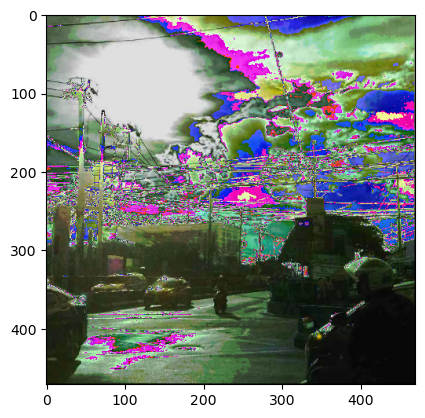

In [13]:
resultant_image = image.copy()
for i in range(1,image.shape[0]-1):
    for j in range(1,image.shape[1]-1):
        blur_factor = (image[i-1, j-1] + image[i-1, j] - image[i-1, j+1] + image[i, j-1] + image[i, j] + image[i, j+1] + image[i+1, j+1] + image[i+1, j] + image[i+1, j+1])/9
        mask = boost_factor*image[i, j] - blur_factor
        resultant_image[i, j] = image[i, j] + mask
        for k in range(3):
            if resultant_image[i, j][k]>255:
                resultant_image[i, j][k]=255
            if resultant_image[i, j][k]<0:
                resultant_image[i, j][k]=0
plt.imshow(resultant_image)
plt.show()